In this exercise we are going to use Boston Data

In [1]:
import pandas as pd 
import numpy as np

In [2]:
BostonData = pd.read_csv("Boston.csv")
del BostonData['Unnamed: 0']
BostonData.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#### let's first categorize medv to 4 groups. 
Lowest 20% medv is categorized as Level 1

next 30% medv is categorized as Level 2

next 30% medv is categorized as Level 3

Top 20% medv is categorized as Level 4


In [3]:
BostonData['medvCategory'] = np.array(pd.qcut(BostonData['medv'], q = [0, .2, .5, .8, 1], labels = ['1','2','3','4']))
BostonData.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,medvCategory
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,3
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,3
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,4
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,4


#### Our goal is to predict medvCategory based on 'rm', 'ptratio' and 'lstat' 
#### First split your data into train, valid, and test sets, use 60%-20%-20% split.

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [5]:
X = BostonData[[ 'rm', 'ptratio', 'lstat']]
y = BostonData['medvCategory']

from sklearn import neighbors, metrics # The KNN function sits inside the neighbors subpackage of sklearn


In [6]:
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.2, random_state = 10)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size = 0.25, random_state = 11) 

train_notaccuracy = []
valid_notaccuracy = []

#### Run a KNN classifier to select the best K value. Use <font color=red>misclassification error</font> as your selection criterion. Set weights to uniform. Standardize your data using the StandardScaler function (remember not to standardize the validation set/test set at the same time with the training set).

In [7]:
# Scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # Instantiate
scaler.fit(X_train) # First fit the data

X_train = pd.DataFrame(scaler.transform(X_train)) # Then transform the data. We can also use fit_transform
X_valid = pd.DataFrame(scaler.transform(X_valid))
#X_test = pd.DataFrame(scaler.transform(X_test))
# Remember, the steps are fit, then transform

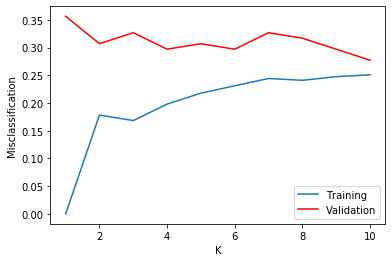

In [8]:
for k in range(1, 11):
    knn = neighbors.KNeighborsClassifier(n_neighbors = k, weights='uniform')
    knn.fit(X_train, y_train)

    y_hat = knn.predict(X_train)
    train_notaccuracy.append(sum(y_hat != y_train)/len(y_train))
    y_hat = knn.predict(X_valid)
    valid_notaccuracy.append(sum(y_hat != y_valid)/len(y_valid))

plt.plot(range(1, 11), train_notaccuracy, label = 'Training')
plt.plot(range(1, 11), valid_notaccuracy, color = 'red', label = 'Validation')
plt.xlabel("K")
plt.ylabel("Misclassification")
plt.legend()
plt.show()

#### What is the best K value? What is the misclassification rate on the validation set with this K value?

In [9]:
bestK = np.argmin(valid_notaccuracy)+1 # Notice here we use argmin, for the minimum error
print(bestK)

10


In [10]:
knn = neighbors.KNeighborsClassifier(n_neighbors = bestK, weights='uniform')
knn.fit(X_valid, y_valid)
yhat = knn.predict(X_valid)
np.mean(yhat != y_valid) # misclassification rate on the validation set

0.2871287128712871

Answer: 10; 0.2871287128712871

#### Train your algorithm with the optimal K you found above, and report the misclassification rate on the test set.

In [11]:
# Remember to standardize the data
scaler.fit(X_train_valid)
X_train_valid = pd.DataFrame(scaler.transform(X_train_valid))
X_test = pd.DataFrame(scaler.transform(X_test))

knn = neighbors.KNeighborsClassifier(n_neighbors = bestK, weights='uniform')
knn.fit(X_train_valid, y_train_valid)
yhat = knn.predict(X_test)
np.mean(yhat != y_test)

0.27450980392156865

Answer: 0.27450980392156865

#### Using this model, predict the class of a neighborhood with rm = 2, lstat = 3.5 and ptratio = 19. What class did you get? (Remember the standardization you did before)

In [12]:
#X1=[2,3.5,19]
X1 = pd.DataFrame (data =[[2,3.5,19]], index =[0], columns = ['rm', 'ptratio', 'lstat'])
scaler.fit(X_train_valid)
X1 = pd.DataFrame(scaler.transform(X1))

yhat = knn.predict(X1)
yhat

array(['1'], dtype=object)

Answer:  medvCategory as Level 1

#### Now let's run a KNN-regression model to predict MEDV, but use all the variables this time. What is the best k value to use? What is the MSE on the test set with this best K value? (You may add more cells more better code readability)

In [13]:
BostonData.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,medvCategory
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,3
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,3
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,4
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,4


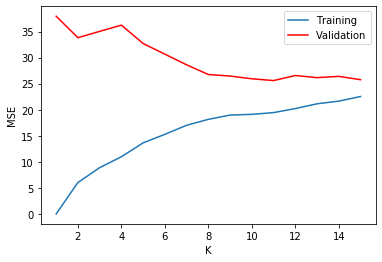

In [14]:
X2 = BostonData.iloc[:,:13]
y2 = BostonData["medv"]

#First split your data into train, valid, and test sets, use 60%-20%-20% split.
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X2, y2, test_size=0.2, random_state = 12)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size = 0.25, random_state = 13) 

# Scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() # Instantiate
scaler.fit(X_train) # First fit the data

X_train = pd.DataFrame(scaler.transform(X_train)) # Then transform the data. We can also use fit_transform
X_valid = pd.DataFrame(scaler.transform(X_valid))
# Remember, the steps are fit, then transform

train_mse = []
valid_mse = []
for k in range(1, 16):
    knn = neighbors.KNeighborsRegressor(n_neighbors = k, weights='uniform')
    knn.fit(X_train, y_train)
    
    y_hat = knn.predict(X_train)
    train_mse.append(metrics.mean_squared_error(y_hat, y_train))
    y_hat = knn.predict(X_valid)
    valid_mse.append(metrics.mean_squared_error(y_hat, y_valid))

plt.plot(range(1, 16), train_mse, label = 'Training')
plt.plot(range(1, 16), valid_mse, color = 'red', label = 'Validation')
plt.xlabel("K")
plt.ylabel("MSE")
plt.legend()
plt.show()

In [15]:
bestK = np.argmin(valid_mse)+1 # Notice here we use argmin, for the minimum error
print(bestK)

11


In [16]:
scaler.fit(X_train_valid)
X_train_valid = pd.DataFrame(scaler.transform(X_train_valid))
X_test = pd.DataFrame(scaler.transform(X_test))

knn = neighbors.KNeighborsRegressor(n_neighbors = bestK, weights='uniform')
knn.fit(X_train_valid,y_train_valid)

y_hat = knn.predict(X_test)
metrics.mean_squared_error(y_hat, y_test)

17.003202074218116

Answer: k = 11; MSE = 17.003202074218116